In [1]:
# this file takes in all files and produce the appropriate d2s analysis
from pathlib import Path
from datasets import load_dataset
from evaluate import load
import pandas as pd
import numpy as np
from pathlib import Path
from functional import seq
from funcutils import underscore as _
from funcutils import get
from IPython.display import display, display_html, HTML
from editdistance import distance as edit_distance

import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)

In [3]:
dspl_html = lambda x: display_html(x, raw=True)
rouge = load('rouge')

In [4]:
root_path = Path("/home/vente/repos/nlgs-research")

pkl = list((root_path / "pipeline/predictions").glob("*mt*"))[1]
pkl

PosixPath('/home/vente/repos/nlgs-research/pipeline/predictions/mt-t5-base-5.pkl')

In [5]:
OUTPUT_PATH = root_path / "pipeline/scores" / pkl.name.removesuffix(".pkl")
OUTPUT_PATH.mkdir(exist_ok=True)
OUTPUT_PATH

PosixPath('/home/vente/repos/nlgs-research/pipeline/scores/mt-t5-base-5')

 ## First, Data to sentence.

In [6]:
preds_raw = pd.read_pickle(pkl)
test_predictions = preds_raw[preds_raw.task == 'd2s']
test_predictions 

,record_idx,seed_number,subset,category,split_index,sd,nl,task,input_ids,attention_mask,labels,pred_ids,decoded
77337,14495,0,test,Airport,0,"d2s 0: Abilene, Texas is served by the Abilene...","Abilene Regional Airport|city served|Abilene, ...",d2s,"[891, 23, 14205, 7676, 5735, 9175, 6726, 2098,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 3, 632, 10, 891, 23, 14205, 6,...","[0, 3, 26, 357, 7, 3, 632, 10, 891, 23, 14205,...",d2s 0: Abilene Regional Airport serves the cit...
77339,14495,1,test,Airport,0,d2s 1: Abilene Regional Airport serves the cit...,"Abilene Regional Airport|city served|Abilene, ...",d2s,"[891, 23, 14205, 7676, 5735, 9175, 6726, 2098,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 209, 10, 891, 23, 14205, 7676,...","[0, 3, 26, 357, 7, 3, 632, 10, 891, 23, 14205,...",d2s 0: Abilene Regional Airport serves the cit...
77341,14496,0,test,Airport,1,d2s 0: Adolfo Suarez Madrid-Barajas Airport ca...,Adolfo Suarez Madrid-Barajas Airport|location|...,d2s,"[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 3, 632, 10, 1980, 32, 40, 89, ...","[0, 3, 26, 357, 7, 3, 632, 10, 1980, 32, 40, 8...",d2s 0: Adolfo Suarez Madrid-Barajas Airport is...
77343,14496,1,test,Airport,1,d2s 1: Adolfo Suarez Madrid-Barajas airport is...,Adolfo Suarez Madrid-Barajas Airport|location|...,d2s,"[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 209, 10, 1980, 32, 40, 89, 32,...","[0, 3, 26, 357, 7, 3, 632, 10, 1980, 32, 40, 8...",d2s 0: Adolfo Suarez Madrid-Barajas Airport is...
77345,14496,2,test,Airport,1,d2s 2: Adolfo Suarez Madrid-Barajas Airport is...,Adolfo Suarez Madrid-Barajas Airport|location|...,d2s,"[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 204, 10, 1980, 32, 40, 89, 32,...","[0, 3, 26, 357, 7, 3, 632, 10, 1980, 32, 40, 8...",d2s 0: Adolfo Suarez Madrid-Barajas Airport is...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85775,16092,1,test,University,1597,"d2s 1: Established in 1928, the School of Busi...",School of Business and Social Sciences at the ...,d2s,"[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 209, 10, 25275, 16, 29004, 6, ...","[0, 3, 26, 357, 7, 3, 632, 10, 37, 1121, 13, 1...",d2s 0: The School of Business and Social Scien...
85777,16093,0,test,University,1598,d2s 0: Denmark is led by the Monarchy of Demar...,School of Business and Social Sciences at the ...,d2s,"[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 3, 632, 10, 18001, 19, 2237, 5...","[0, 3, 26, 357, 7, 3, 632, 10, 37, 1121, 13, 1...",d2s 0: The School of Business and Social Scien...
85779,16093,1,test,University,1598,d2s 1: The School of Business and Social Scien...,School of Business and Social Sciences at the ...,d2s,"[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 209, 10, 37, 1121, 13, 1769, 1...","[0, 3, 26, 357, 7, 3, 632, 10, 37, 1121, 13, 1...",d2s 0: The School of Business and Social Scien...
85781,16093,2,test,University,1598,d2s 2: The School of Business and Social Scien...,School of Business and Social Sciences at the ...,d2s,"[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 204, 10, 37, 1121, 13, 1769, 1...","[0, 3, 26, 357, 7, 3, 632, 10, 37, 1121, 13, 1...",d2s 0: The School of Business and Social Scien...


In [7]:
compute_rouge = lambda x,y: rouge.compute(references=[x], predictions=[y], use_stemmer=False, use_aggregator=False)
compute_rouge(["general kenobi"], "general kenobi")
y_pred = test_predictions.drop(columns=['input_ids','attention_mask','pred_ids','labels'])

In [8]:
chunked = (
  seq(y_pred.to_dict('records'))
    .group_by(get.record_idx)
    .map(get[1]) # focus on teh values
    .map(lambda x: [
      seq(x).map(get.sd).map(get[7:]).to_list(),        # gather up all of the references
      seq(x).map(get.decoded).to_list()[0][7:] # and the first prediction
    ])
)
chunked

"['Abilene, Texas is served by the Abilene regional airport.', 'Abilene Regional Airport serves the city of Abilene in Texas.']","Abilene Regional Airport serves the city of Abilene, Texas."
"['Adolfo Suarez Madrid-Barajas Airport can be found in Madrid, Paracuellos de Jarama, San Sebastian de los Reyes and Alcobendas.', 'Adolfo Suarez Madrid-Barajas airport is located at Madrid, Paracuellos de Jarama, San Sebastian de los Reyes and Alcobendas.', 'Adolfo Suarez Madrid-Barajas Airport is located in Madrid, Paracuellos de Jarama, San Sebastian de los Reyes and Alcobendas.']","Adolfo Suarez Madrid-Barajas Airport is located in Madrid, Paracuellos de Jarama, San Sebastian de los Reyes and Alcobendas."
"['The runway name of Adolfo Suarez Madrid-Barajas Airport is 18L/36R.', 'The runway name at Adolfo Suarez Madrid-Barajas airport is 18L/36R.', 'The runway name of Adolfo Suarez Madrid-Barajas Airport is 18L/36R.']",The runway name of Adolfo Suarez Madrid-Barajas Airport is 18L/36R.
"['Afonso Pena International Airport ICAO Location Idenitifier is SBCT.', 'SBCT is the ICAO location identifier of Afonso Pena International Airport.']",The ICAO Location Identifier of Afonso Pena International Airport is SBCT.
"['Afonso Pena International Airport serves the city of Curitiba.', 'Afonso Pena International Airport serves Curitiba.']",Afonso Pena International Airport serves the city of Curitiba.
"['The Al Taqaddum Air Base serves the city of Fallujah.', 'Al-Taqaddum Air Base serves the city of Fallujah.']",Al Taqaddum Air Base serves the city of Fallujah.
"['The runway length of Al-Taqaddum Air Base is 3684.0.', 'The length of the runway at Al-Taqaddum Air Base is 3684.0.']",Al Taqaddum Air Base has a runway length of 3684.0.
"['Alderney Airport runway name is 14/32.', '14/32 is the runway name of Alderney Airport.', 'The runway name of Alderney Airport is 14/32.']",The runway name of Alderney Airport is 14/32.
"['The runway length at Allama Iqbal International Airport is 3,360.12.', 'The runway at Allama Iqbal International Airport has a length of 3360.12.', 'The runway at Allama Iqbal International Airport is 3360.12 long.']",Allama Iqbal International Airport has a runway length of 3360.12 metres.
"[""The first runway at Amsterdam's Schiphol Airport is known as Number 18."", ""The Amsterdam Airport Schiphol's 1st runway number is 18."", 'The number of the 1st runway at Amsterdam Airport Schiphol is 18.']",The 1st runway at Amsterdam Airport Schiphol is number 18.


In [9]:
rouge_scores = (
  chunked.starmap(compute_rouge)
    # only one rouge per sample, so take the first of the values
    .map(lambda x: seq(x.items()).starmap(lambda x,y : {x:y[0]}))
    # rolling union on dictionaries since they are disjoint
    .map(lambda x: seq(x).reduce(lambda x, y: x | y))
    .to_pandas()
)
rouge_scores

,rouge1,rouge2,rougeL,rougeLsum
0,0.947368,0.823529,0.947368,0.947368
1,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000
3,1.000000,0.800000,0.818182,0.818182
4,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...
1595,0.771654,0.544000,0.543860,0.543860
1596,0.760870,0.449438,0.500000,0.500000
1597,0.898876,0.659091,0.651685,0.651685
1598,0.780488,0.571429,0.688172,0.688172


In [10]:
rouge_scores.describe()

,rouge1,rouge2,rougeL,rougeLsum
count,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.827442,0.646554,0.721487,0.721487
std,0.154468,0.220211,0.202408,0.202408
min,0.001956,0.000000,0.001956,0.001956
25%,0.761905,0.500000,0.586207,0.586207
50%,0.846154,0.642857,0.727273,0.727273
75%,0.923077,0.790940,0.888889,0.888889
max,1.000000,1.000000,1.000000,1.000000


In [11]:
bleu = load('sacrebleu')
bleu
compute_bleu = lambda x,y: bleu.compute(references=[x], predictions=[y])

In [12]:
bleu_scores = (
  chunked.starmap(compute_bleu)
    .to_pandas()
)

In [13]:
bleu_scores

,score,counts,totals,precisions,bp,sys_len,ref_len
0,83.499502,"[11, 10, 7, 5]","[11, 10, 9, 8]","[100.0, 100.0, 77.77777777777777, 62.5]",1.000000,11,11
1,100.000000,"[21, 20, 19, 18]","[21, 20, 19, 18]","[100.0, 100.0, 100.0, 100.0]",1.000000,21,21
2,100.000000,"[13, 12, 11, 10]","[13, 12, 11, 10]","[100.0, 100.0, 100.0, 100.0]",1.000000,13,13
3,46.595384,"[10, 7, 4, 2]","[12, 11, 10, 9]","[83.33333333333333, 63.63636363636363, 40.0, 2...",1.000000,12,12
4,100.000000,"[10, 9, 8, 7]","[10, 9, 8, 7]","[100.0, 100.0, 100.0, 100.0]",1.000000,10,10
...,...,...,...,...,...,...,...
1595,59.472485,"[58, 46, 36, 27]","[68, 67, 66, 65]","[85.29411764705883, 68.65671641791045, 54.5454...",0.985402,68,69
1596,35.671133,"[37, 25, 14, 9]","[46, 45, 44, 43]","[80.43478260869566, 55.55555555555556, 31.8181...",0.858839,46,53
1597,56.747983,"[44, 31, 24, 19]","[51, 50, 49, 48]","[86.27450980392157, 62.0, 48.97959183673469, 3...",1.000000,51,47
1598,50.589154,"[44, 33, 23, 15]","[49, 48, 47, 46]","[89.79591836734694, 68.75, 48.93617021276596, ...",0.902993,49,54


In [14]:
bertscore = load('bertscore')
compute_bert = lambda x,y: bertscore.compute(predictions=[y], references=[x], lang="en", model_type="distilbert-base-uncased" )

In [15]:
bert_scores = (
 chunked
   .starmap(compute_bert)
   .to_pandas()
   .drop(columns='hashcode')
   .applymap(np.mean)
)

In [16]:
prepend_name_to_cols = lambda x,y : x.rename(columns=lambda e: y+"_"+e)
prepend_name_to_cols(bert_scores, 'bert')
all_scores = (
  seq(bert_scores, bleu_scores, rouge_scores)
    .zip(['bert','bleu','rouge'])
    .starmap(prepend_name_to_cols)
)
scores_df = pd.concat(all_scores, axis=1)
scores_df

,bert_precision,bert_recall,bert_f1,bleu_score,bleu_counts,bleu_totals,bleu_precisions,bleu_bp,bleu_sys_len,bleu_ref_len,rouge_rouge1,rouge_rouge2,rouge_rougeL,rouge_rougeLsum
0,0.988835,0.977650,0.983211,83.499502,"[11, 10, 7, 5]","[11, 10, 9, 8]","[100.0, 100.0, 77.77777777777777, 62.5]",1.000000,11,11,0.947368,0.823529,0.947368,0.947368
1,1.000000,1.000000,1.000000,100.000000,"[21, 20, 19, 18]","[21, 20, 19, 18]","[100.0, 100.0, 100.0, 100.0]",1.000000,21,21,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,100.000000,"[13, 12, 11, 10]","[13, 12, 11, 10]","[100.0, 100.0, 100.0, 100.0]",1.000000,13,13,1.000000,1.000000,1.000000,1.000000
3,0.967089,0.967089,0.967089,46.595384,"[10, 7, 4, 2]","[12, 11, 10, 9]","[83.33333333333333, 63.63636363636363, 40.0, 2...",1.000000,12,12,1.000000,0.800000,0.818182,0.818182
4,1.000000,1.000000,1.000000,100.000000,"[10, 9, 8, 7]","[10, 9, 8, 7]","[100.0, 100.0, 100.0, 100.0]",1.000000,10,10,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.894135,0.920287,0.903442,59.472485,"[58, 46, 36, 27]","[68, 67, 66, 65]","[85.29411764705883, 68.65671641791045, 54.5454...",0.985402,68,69,0.771654,0.544000,0.543860,0.543860
1596,0.927562,0.911370,0.919395,35.671133,"[37, 25, 14, 9]","[46, 45, 44, 43]","[80.43478260869566, 55.55555555555556, 31.8181...",0.858839,46,53,0.760870,0.449438,0.500000,0.500000
1597,0.955373,0.964343,0.959837,56.747983,"[44, 31, 24, 19]","[51, 50, 49, 48]","[86.27450980392157, 62.0, 48.97959183673469, 3...",1.000000,51,47,0.898876,0.659091,0.651685,0.651685
1598,0.937087,0.929455,0.923518,50.589154,"[44, 33, 23, 15]","[49, 48, 47, 46]","[89.79591836734694, 68.75, 48.93617021276596, ...",0.902993,49,54,0.780488,0.571429,0.688172,0.688172


In [17]:
scores_df.describe()

,bert_precision,bert_recall,bert_f1,bleu_score,bleu_bp,bleu_sys_len,bleu_ref_len,rouge_rouge1,rouge_rouge2,rouge_rougeL,rouge_rougeLsum
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.946182,0.944105,0.943842,59.336331,0.956134,50.42375,22.270625,0.827442,0.646554,0.721487,0.721487
std,0.067918,0.047246,0.058236,25.145519,0.092594,237.73026,10.988078,0.154468,0.220211,0.202408,0.202408
min,0.380465,0.569171,0.458775,0.034722,0.135335,4.00000,5.000000,0.001956,0.000000,0.001956,0.001956
25%,0.932447,0.923093,0.927357,42.310688,0.945959,13.00000,13.000000,0.761905,0.500000,0.586207,0.586207
50%,0.954142,0.947232,0.948903,58.894498,1.000000,21.00000,21.000000,0.846154,0.642857,0.727273,0.727273
75%,0.977445,0.975250,0.974680,76.458043,1.000000,29.00000,30.000000,0.923077,0.790940,0.888889,0.888889
max,1.000000,1.000000,1.000000,100.000000,1.000000,2041.00000,69.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
scores_df.to_pickle(OUTPUT_PATH / "d2s_scores.pkl")

In [19]:
test_predictions  = preds_raw[preds_raw.task == 's2d']

In [20]:
# define set notion of precision when multiple labels are assigned
# to a single instance, with epsilon preventing div by zero
def compute_f_measure(pred: set[str], gt: set[str], epsilon=1e-99):
    tp = len(pred.intersection(gt)) # pred true and actually true
    fp = len(gt - pred)             # in pred but not in gt
    fn = len(pred - gt)             # not in pred but actualy true

    prec = tp / (tp + fp + epsilon) 
    recl = tp / (tp + fn + epsilon) 
    f1 = (2 * prec * recl) / (prec + recl + epsilon)
    return f1

 ## Unit Tests

In [21]:
assert compute_f_measure(set("a"), set('a')) == 1
assert compute_f_measure(set("ab"), set('a')) == 2/3
assert compute_f_measure(set() , set('a')) == 0

In [22]:
test_predictions.decoded

77336    s2d 0: Abilene Regional Airport|city served|Ab...
77338    s2d 0: Abilene Regional Airport|city served|Ab...
77340    s2d 0: Adolfo Suarez Madrid-Barajas Airport|lo...
77342    s2d 0: Adolfo Suarez Madrid-Barajas Airport|lo...
77344    s2d 0: Adolfo Suarez Madrid-Barajas Airport|lo...
                               ...                        
85774    s2d 0: School of Business and Social Sciences ...
85776    s2d 0: Denmark|leader name|Lars Lokke Rasmusse...
85778    s2d 0: School of Business and Social Sciences ...
85780    s2d 0: School of Business and Social Sciences ...
85782    s2d 0: School of Business and Social Sciences ...
Name: decoded, Length: 4224, dtype: object

In [23]:
# don't penalize for quotes or spaces
norm_split_set = lambda x: (
  x.str.upper()
  .str.replace("'", '')
  .str.replace(' ','')
  .str.replace("S2D\d:", "")
  .map(_.split(";")).map(set)
)
y_pred = norm_split_set(test_predictions.decoded)
y_pred

<ipython-input-23-22d7acf8b1a3>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  x.str.upper()


77336    {ABILENEREGIONALAIRPORT|CITYSERVED|ABILENE,TEXAS}
77338    {ABILENEREGIONALAIRPORT|CITYSERVED|ABILENE,TEXAS}
77340    {ADOLFOSUAREZMADRID-BARAJASAIRPORT|LOCATION|MA...
77342    {ADOLFOSUAREZMADRID-BARAJASAIRPORT|LOCATION|MA...
77344    {ADOLFOSUAREZMADRID-BARAJASAIRPORT|LOCATION|MA...
                               ...                        
85774    {SCHOOLOFBUSINESSANDSOCIALSCIENCESATTHEAARHUSU...
85776    {SCHOOLOFBUSINESSANDSOCIALSCIENCESATTHEAARHUSU...
85778    {SCHOOLOFBUSINESSANDSOCIALSCIENCESATTHEAARHUSU...
85780    {SCHOOLOFBUSINESSANDSOCIALSCIENCESATTHEAARHUSU...
85782    {SCHOOLOFBUSINESSANDSOCIALSCIENCESATTHEAARHUSU...
Name: decoded, Length: 4224, dtype: object

In [24]:
y_true = norm_split_set(test_predictions.sd)
y_true

<ipython-input-23-22d7acf8b1a3>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  x.str.upper()


77336    {ABILENEREGIONALAIRPORT|CITYSERVED|ABILENE,TEXAS}
77338    {ABILENEREGIONALAIRPORT|CITYSERVED|ABILENE,TEXAS}
77340    {ADOLFOSUAREZMADRID-BARAJASAIRPORT|LOCATION|MA...
77342    {ADOLFOSUAREZMADRID-BARAJASAIRPORT|LOCATION|MA...
77344    {ADOLFOSUAREZMADRID-BARAJASAIRPORT|LOCATION|MA...
                               ...                        
85774    {SCHOOLOFBUSINESSANDSOCIALSCIENCESATTHEAARHUSU...
85776    {AARHUS|GOVERNMENTTYPE|MAGISTRATE, SCHOOLOFBUS...
85778    {AARHUS|GOVERNMENTTYPE|MAGISTRATE, SCHOOLOFBUS...
85780    {AARHUS|GOVERNMENTTYPE|MAGISTRATE, SCHOOLOFBUS...
85782    {SCHOOLOFBUSINESSANDSOCIALSCIENCESATTHEAARHUSU...
Name: sd, Length: 4224, dtype: object

In [25]:
f1_scores = seq(y_pred).zip(y_true).starmap(compute_f_measure).to_list()
f1_scores

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [26]:
def compute_closest_edit_dists(y_pred, y_true):
    # we need an alignment of the labels by edit distance
    return (
      seq(y_pred)
        .cartesian(y_true)
        .starmap(edit_distance) 
        .sorted()
        # full penalty for missed guesses or too many guesses
        .to_list()
    )

edit_distances = (
  seq(y_pred)
    .zip(y_true)
    .starmap(compute_closest_edit_dists)
    .map(np.mean)
    .to_list()
)
edit_distances 

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.0,
 7.0,
 0.0,
 0.0,
 21.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 21.5,
 0.0,
 21.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 26.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [27]:
results = test_predictions
results['f1_scores'] = f1_scores
results['med_scores'] = edit_distances # med mean edit distance
results 

<ipython-input-27-f08b752f341e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['f1_scores'] = f1_scores
<ipython-input-27-f08b752f341e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['med_scores'] = edit_distances # med mean edit distance


,record_idx,seed_number,subset,category,split_index,sd,nl,task,input_ids,attention_mask,labels,pred_ids,decoded,f1_scores,med_scores
77336,14495,0,test,Airport,0,s2d 0: Abilene Regional Airport|city served|Ab...,"Abilene, Texas is served by the Abilene region...",s2d,"[891, 23, 14205, 6, 2514, 19, 2098, 57, 8, 891...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 3, 632, 10, 891, 23, 14205, 76...","[0, 3, 7, 357, 26, 3, 632, 10, 891, 23, 14205,...",s2d 0: Abilene Regional Airport|city served|Ab...,1.000000,0.000000
77338,14495,1,test,Airport,0,s2d 1: Abilene Regional Airport|city served|Ab...,Abilene Regional Airport serves the city of Ab...,s2d,"[891, 23, 14205, 7676, 5735, 4657, 8, 690, 13,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 209, 10, 891, 23, 14205, 7676,...","[0, 3, 7, 357, 26, 3, 632, 10, 891, 23, 14205,...",s2d 0: Abilene Regional Airport|city served|Ab...,1.000000,0.000000
77340,14496,0,test,Airport,1,s2d 0: Adolfo Suarez Madrid-Barajas Airport|lo...,Adolfo Suarez Madrid-Barajas Airport can be fo...,s2d,"[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 3, 632, 10, 1980, 32, 40, 89, ...","[0, 3, 7, 357, 26, 3, 632, 10, 1980, 32, 40, 8...",s2d 0: Adolfo Suarez Madrid-Barajas Airport|lo...,1.000000,0.000000
77342,14496,1,test,Airport,1,s2d 1: Adolfo Suarez Madrid-Barajas Airport|lo...,Adolfo Suarez Madrid-Barajas airport is locate...,s2d,"[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 209, 10, 1980, 32, 40, 89, 32,...","[0, 3, 7, 357, 26, 3, 632, 10, 1980, 32, 40, 8...",s2d 0: Adolfo Suarez Madrid-Barajas Airport|lo...,1.000000,0.000000
77344,14496,2,test,Airport,1,s2d 2: Adolfo Suarez Madrid-Barajas Airport|lo...,Adolfo Suarez Madrid-Barajas Airport is locate...,s2d,"[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 204, 10, 1980, 32, 40, 89, 32,...","[0, 3, 7, 357, 26, 3, 632, 10, 1980, 32, 40, 8...",s2d 0: Adolfo Suarez Madrid-Barajas Airport|lo...,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85774,16092,1,test,University,1597,s2d 1: School of Business and Social Sciences ...,"Established in 1928, the School of Business an...",s2d,"[25275, 16, 29004, 6, 8, 1121, 13, 1769, 11, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 209, 10, 1121, 13, 1769, 11, 2...","[0, 3, 7, 357, 26, 3, 632, 10, 1121, 13, 1769,...",s2d 0: School of Business and Social Sciences ...,1.000000,28.612245
85776,16093,0,test,University,1598,s2d 0: School of Business and Social Sciences ...,Denmark is led by the Monarchy of Demark and t...,s2d,"[18001, 19, 2237, 57, 8, 2963, 7064, 63, 13, 3...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 3, 632, 10, 1121, 13, 1769, 11...","[0, 3, 7, 357, 26, 3, 632, 10, 18001, 9175, 22...",s2d 0: Denmark|leader name|Lars Lokke Rasmusse...,0.666667,39.457143
85778,16093,1,test,University,1598,s2d 1: School of Business and Social Sciences ...,The School of Business and Social Sciences at ...,s2d,"[37, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 209, 10, 1121, 13, 1769, 11, 2...","[0, 3, 7, 357, 26, 3, 632, 10, 1121, 13, 1769,...",s2d 0: School of Business and Social Sciences ...,0.769231,41.761905
85780,16093,2,test,University,1598,s2d 2: School of Business and Social Sciences ...,The School of Business and Social Sciences at ...,s2d,"[37, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 204, 10, 1121, 13, 1769, 11, 2...","[0, 3, 7, 357, 26, 3, 632, 10, 1121, 13, 1769,...",s2d 0: School of Business and Social Sciences ...,0.857143,41.408163


In [28]:
results.describe()

,record_idx,seed_number,split_index,f1_scores,med_scores
count,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000
mean,15306.636600,0.902462,811.636600,0.894621,17.403753
std,454.419137,0.838034,454.419137,0.216054,87.742477
min,14495.000000,0.000000,0.000000,0.000000,0.000000
25%,14929.000000,0.000000,434.000000,0.857143,9.000000
50%,15311.000000,1.000000,816.000000,1.000000,16.666667
75%,15697.250000,2.000000,1202.250000,1.000000,22.125000
max,16094.000000,7.000000,1599.000000,1.000000,5318.000000


In [29]:
# let's define nth finish and "place-number" as 0 for "finishing in first place"
# give find the place-number given a score: ties should have the same place
score_to_nth_finish: dict[float, int]= (
  seq(f1_scores)
    .sorted(reverse=True) # Highest to lowest
    .zip_with_index()     # gives an over-estimate of nth-finish
    .group_by(get[0])     # so we group by the f1 scores
    .map(get[1])          # then we get the actual place of the score
    .map(get[0])          # it's sorted, so take the first to account for ties
    .to_dict()            # convert to dictionary
)
seq(score_to_nth_finish.items()).to_pandas()

,0,1
0,1.000000,0
1,0.923077,3028
2,0.909091,3047
3,0.888889,3067
4,0.857143,3153
5,0.833333,3245
6,0.833333,3261
7,0.800000,3264
8,0.800000,3378
9,0.769231,3430


  so we can sort by this key later, and also get a broad impression
 of the distribution of errors. Later we'll plot a histogram anyway.

 ## Error analysis

In [30]:
results['nth_finish'] = results['f1_scores'].map(score_to_nth_finish)
results['nth_finish'] 

<ipython-input-30-0dbc72faf808>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['nth_finish'] = results['f1_scores'].map(score_to_nth_finish)


77336       0
77338       0
77340       0
77342       0
77344       0
         ... 
85774       0
85776    3623
85778    3430
85780    3153
85782       0
Name: nth_finish, Length: 4224, dtype: int64

In [31]:
results[['nth_finish','med_scores', 'f1_scores', 'decoded','sd']].round(3).to_csv('vis.csv')

In [32]:
# 
worst_finishes = results[results.f1_scores == 0]
dspl_html(worst_finishes[['med_scores','f1_scores', 'decoded','sd']].to_html())
print(len(worst_finishes))

,med_scores,f1_scores,decoded,sd
77400,6.000000,0.0,s2d 0: Andrews Airport|elevation above the sea level (in metres)|973.0,s2d 1: Andrews County Airport|elevation above the sea level (in metres)|973.0
77428,2.000000,0.0,s2d 0: Appleton International Airport|runway length|2394.0,s2d 1: Appleton International Airport|runway length|2439.0
77430,2.000000,0.0,s2d 0: Appleton International Airport|runway length|2399.0,s2d 2: Appleton International Airport|runway length|2439.0
77500,7.000000,0.0,"s2d 0: Maple Ridge Township, Alpena County, Michigan|country|United States","s2d 0: Maple Ridge Township, Alpena County, Michigan|is part of|United States"
77502,7.000000,0.0,"s2d 0: Maple Ridge Township, Alpena County, Michigan|country|United States","s2d 1: Maple Ridge Township, Alpena County, Michigan|is part of|United States"
77508,21.000000,0.0,"s2d 0: Port Authority of New Jersey|state|New Jersey; Port Authority of New Jersey|city served|Newark, New Jersey",s2d 1: Port Authority of New York and New Jersey|region served|New Jersey
77606,21.500000,0.0,"s2d 0: Alison ODonnell|genre|Singing; Alison ODonnell|instrument|Bodhran, percussion, autoharp","s2d 0: Alison ODonnell|instrument|Voice, bodhran, percussion, autoharp"
77610,21.500000,0.0,"s2d 0: Alison ODonnell|genre|Singing; Alison ODonnell|instrument|Bodhran, percussion, autoharp","s2d 2: Alison ODonnell|instrument|Voice, bodhran, percussion, autoharp"
77646,26.000000,0.0,s2d 0: Christian Burns|associated band/associated musical artist|Andrew Rayel,s2d 1: Andrew Rayel|associated band/associated musical artist|Christian Burns
77674,4.000000,0.0,s2d 0: Manchester|is part of|Greater Manchester Area,s2d 2: Manchester|is part of|Greater Manchester


120


In [33]:
results[['med_scores','f1_scores']].describe()

,med_scores,f1_scores
count,4224.000000,4224.000000
mean,17.403753,0.894621
std,87.742477,0.216054
min,0.000000,0.000000
25%,9.000000,0.857143
50%,16.666667,1.000000
75%,22.125000,1.000000
max,5318.000000,1.000000


<Axes: >

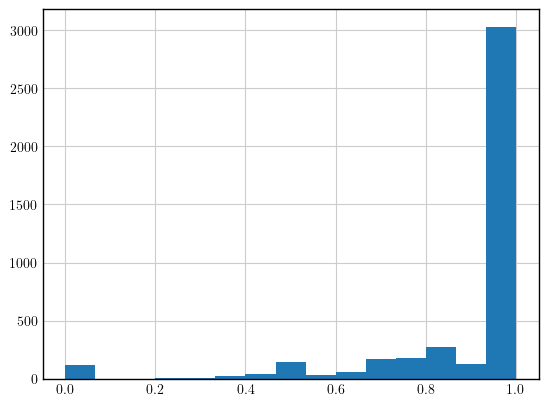

In [34]:
results.f1_scores.hist(bins=15)

<Axes: >

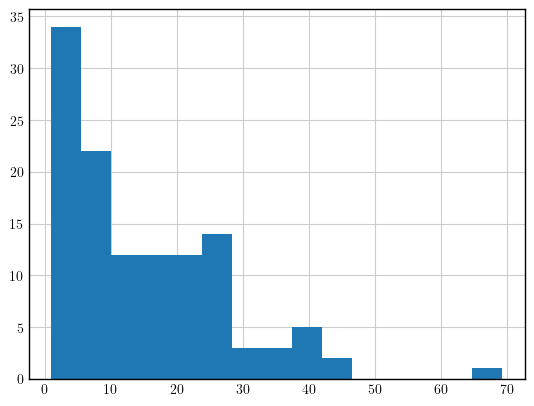

In [35]:
worst_finishes.med_scores.hist(bins=15)

In [36]:
# sparse-bar formation of the same histogram data
ax = (
  worst_finishes
    .med_scores
    .sort_values()
    .map(lambda x: (x // 10) * 10)
    .map(lambda x: "[" + str(int(x)) + ", " + str(int(x+10)) + ")")
    .value_counts()
  # .plot.bar()
)
# ax.set_yscale('log')
print(ax.to_latex())
print(ax.to_markdown())

\begin{tabular}{lr}
\toprule
{} &  med\_scores \\
\midrule
[0, 10)  &          54 \\
[20, 30) &          28 \\
[10, 20) &          26 \\
[30, 40) &           9 \\
[40, 50) &           2 \\
[60, 70) &           1 \\
\bottomrule
\end{tabular}

|          |   med_scores |
|:---------|-------------:|
| [0, 10)  |           54 |
| [20, 30) |           28 |
| [10, 20) |           26 |
| [30, 40) |            9 |
| [40, 50) |            2 |
| [60, 70) |            1 |


<ipython-input-36-0a6ffe0c3c54>:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(ax.to_latex())


<Axes: >

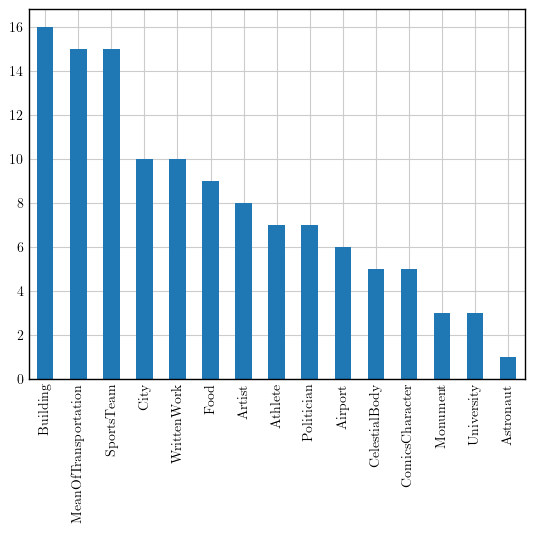

In [37]:
worst_finishes.category.value_counts().plot.bar()

<Axes: >

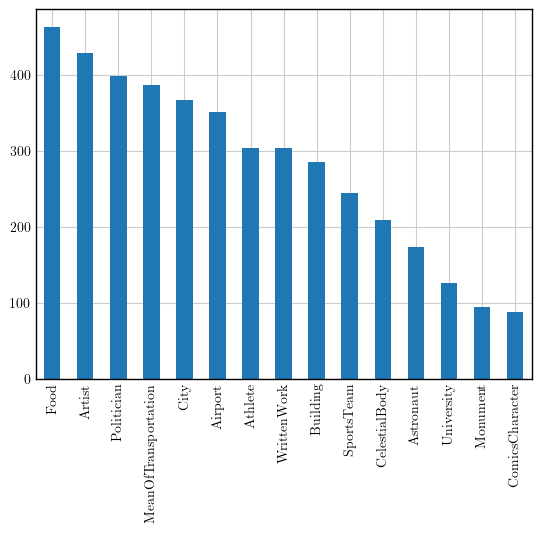

In [38]:
train_corpus = test_predictions
train_corpus.category.value_counts().plot.bar()

<Axes: >

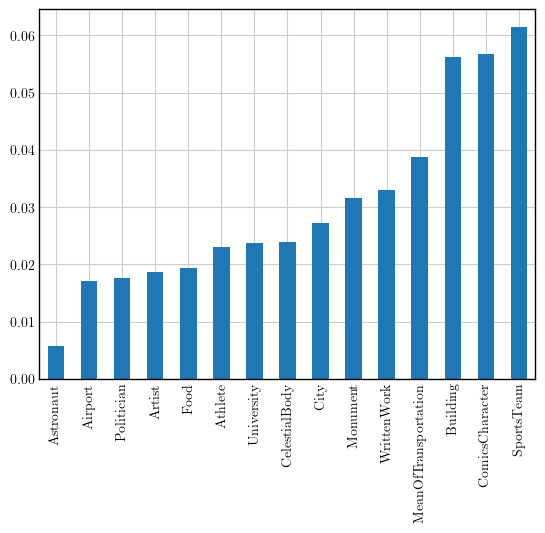

In [39]:
# normalized performance by category
npc = worst_finishes.category.value_counts() / train_corpus.category.value_counts()
npc.sort_values().plot.bar()

 the network performs poorly on buildings, sports teams, and monuments when
 normalized for class prevalence. Poor performance on monument may be explained
 by its under-representation in the training set. This does not hold for sports
 teams and monuments, which have good representation in the training set but do
 not have good performance. This points to qualitative features particular to
 entries in those categories.

In [40]:
worst_finishes.sort_values(by=['med_scores'])

,record_idx,seed_number,subset,category,split_index,sd,nl,task,input_ids,attention_mask,labels,pred_ids,decoded,f1_scores,med_scores,nth_finish
78538,14742,4,test,MeanOfTransportation,247,s2d 4: AIDAstella|maiden voyage|2013-03-17,The ship AIDAstella had her maiden voyage on M...,s2d,"[37, 4383, 71, 26483, 7, 6714, 9, 141, 160, 18...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 314, 10, 71, 26483, 7, 6714, 9...","[0, 3, 7, 357, 26, 3, 632, 10, 71, 26483, 7, 6...",s2d 0: AIDAstella|maiden voyage|2003-03-17,0.0,1.000000,4104
78158,14663,1,test,City,168,"s2d 1: Albany, Georgia|area code|229","The area code for Albany, Georgia, is 229.",s2d,"[37, 616, 1081, 21, 27119, 6, 5664, 6, 19, 163...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...","[3, 7, 357, 26, 209, 10, 27119, 6, 5664, 9175,...","[0, 3, 7, 357, 26, 3, 632, 10, 27119, 6, 5664,...","s2d 0: Albany, Georgia|area code|229.",0.0,1.000000,4104
78156,14663,0,test,City,168,"s2d 0: Albany, Georgia|area code|229","The area code for Albany, Georgia is 229.",s2d,"[37, 616, 1081, 21, 27119, 6, 5664, 19, 1630, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...","[3, 7, 357, 26, 3, 632, 10, 27119, 6, 5664, 91...","[0, 3, 7, 357, 26, 3, 632, 10, 27119, 6, 5664,...","s2d 0: Albany, Georgia|area code|229.",0.0,1.000000,4104
78334,14701,0,test,ComicsCharacter,206,s2d 0: Karl Kesel|nationality|Americans,Karl Kesel's nationality is American.,s2d,"[12345, 480, 20736, 31, 7, 1157, 485, 19, 797,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...","[3, 7, 357, 26, 3, 632, 10, 12345, 480, 20736,...","[0, 3, 7, 357, 26, 3, 632, 10, 12345, 480, 207...",s2d 0: Karl Kesel|nationality|American,0.0,1.000000,4104
78422,14720,0,test,Food,225,s2d 0: Batchoy|ingredient|Shrimp,Shrimp is an ingredient in Batchoy.,s2d,"[22805, 1167, 19, 46, 11322, 16, 28133, 32, 63...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...","[3, 7, 357, 26, 3, 632, 10, 28133, 32, 63, 917...","[0, 3, 7, 357, 26, 3, 632, 10, 28133, 32, 63, ...",s2d 0: Batchoy|ingredient|Skrimp,0.0,1.000000,4104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80804,15170,0,test,WrittenWork,675,s2d 0: Abhandlungen aus dem Mathematischen Sem...,Julius Springer is the founder of Springer Sci...,s2d,"[9983, 302, 4328, 49, 19, 8, 7174, 13, 4328, 4...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 3, 632, 10, 891, 20873, 35, 40...","[0, 3, 7, 357, 26, 3, 632, 10, 891, 20873, 35,...",s2d 0: Abhandlungen aus dem Mathematischen Sem...,0.0,39.250000,4104
80808,15170,2,test,WrittenWork,675,s2d 2: Abhandlungen aus dem Mathematischen Sem...,Julius Springer founded Springer Science and B...,s2d,"[9983, 302, 4328, 49, 5710, 4328, 49, 2854, 11...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 204, 10, 891, 20873, 35, 403, ...","[0, 3, 7, 357, 26, 3, 632, 10, 891, 20873, 35,...",s2d 0: Abhandlungen aus dem Mathematischen Sem...,0.0,39.250000,4104
84032,15762,2,test,Politician,1267,s2d 2: Albert Jennings Fountain|death place|Ne...,On Staten Island in New York City was the birt...,s2d,"[461, 1015, 29, 2834, 16, 368, 1060, 896, 47, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 204, 10, 11375, 1022, 9416, 7,...","[0, 3, 7, 357, 26, 3, 632, 10, 11375, 1022, 94...",s2d 0: Albert Jennings (Native Americans in th...,0.0,42.750000,4104
79738,14979,0,test,Building,484,s2d 0: Amdavad ni Gufa|location|Gujarat; Amdav...,The address of Amdavad ni Gufa is Lalbhai Dalp...,s2d,"[37, 1115, 13, 736, 26, 8644, 26, 3, 29, 23, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 3, 632, 10, 736, 26, 8644, 26,...","[0, 3, 7, 357, 26, 3, 632, 10, 736, 26, 8644, ...",s2d 0: Amdavad ni Gufa|address|Lalbhai Dalpatb...,0.0,44.500000,4104
